In [1]:
#Импортируем все нужные функции и библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [2]:
#Наш изначальный датасет
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


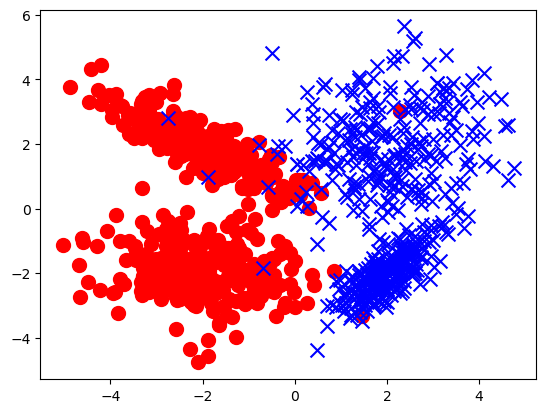

In [3]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [4]:
#Копируем класс градиентного спуска из методички
class SGD():
    def __init__(self, alpha = 0.5, n_iters = 1000):
        self.b = None
        self.alpha = alpha
        self.n_iters = n_iters
    def gradient_step(self, b, b_grad): #Функция градиентного шага, b - градиент функции ошибки
        return b - self.alpha * b_grad
    def optimize(self, X, y, start_b, n_iters): #Функция град.спуска
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y): #Метод обучения
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self.n_iters)

In [5]:
#Копируем класс логистической регрессии оттуда же
class LogReg(SGD):
    def sigmoid(self, X, b): #Функция гипотезы
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b): #Метод вычисления градиента
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    #Методы предсказания: вероятность и точное предсказание
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [6]:
#Обучаем модель с помощью класса LogReg() и выводим её метрики
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.5f} F1-score = {f1:.5f}')

accuracy = 0.97600 F1-score = 0.97614


In [7]:
#Выводим значения вероятностей для каждого объекта принадлежать тому или иному классу
y_pred_proba = logreg.predict_proba(X)
y_pred_proba[:10]

array([9.97639678e-01, 9.96249026e-03, 1.78033798e-01, 3.42428157e-04,
       9.99999853e-01, 9.94911991e-01, 9.99992799e-01, 4.56440118e-02,
       2.53280307e-05, 3.21170535e-03])

In [8]:
y[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

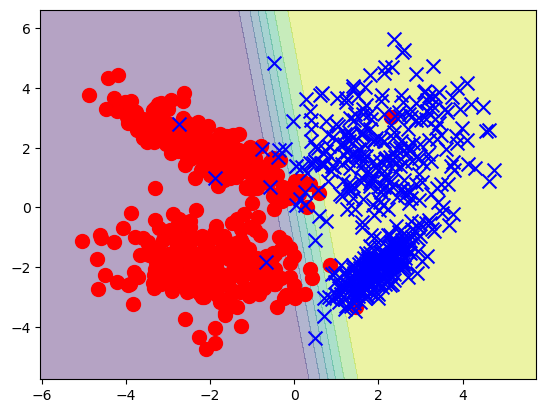

In [9]:
#Выводим контурный график

xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [10]:
#Обучим модель с помощью библиотечной функции и выведем предсказание
model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)
y_pred_lr[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [11]:
y[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

**1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.**

In [12]:
#Выводим метрики по обучению библиотечной функцией. Метрики совпали
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.5f} F1-score = {f1:.5f}')

accuracy = 0.97600 F1-score = 0.97614


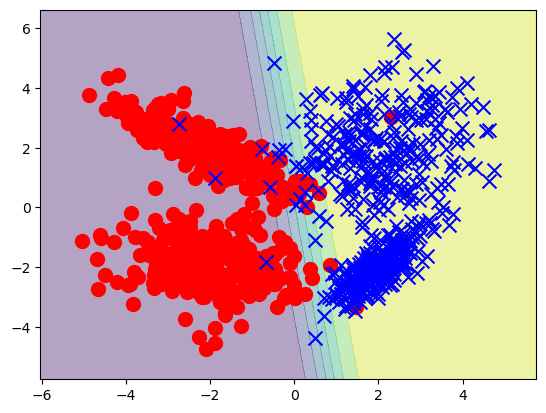

In [13]:
#Выводим контурный график по обучению библиотечной функцией
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = model.predict_proba(XX)[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

**2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.**

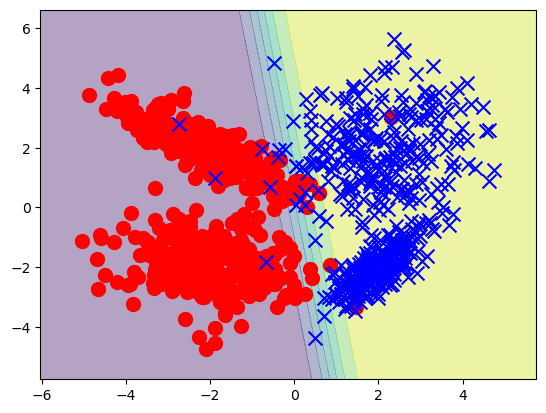

In [14]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logic = LogReg(alpha = 40, n_iters = 10**5) #При альфа = 40 ещё всё нормально
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logic.fit(X, y)

xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = logic.predict_proba(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

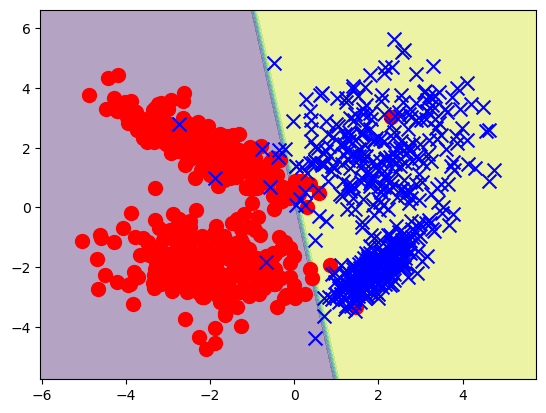

In [15]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logic = LogReg(alpha = 42, n_iters = 10**5) #При альфа = 42 всё начинает ухудшаться
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logic.fit(X, y)

xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = logic.predict_proba(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

Критическая точка в районе 42

/var/folders/fn/372dbz5d1fs8nt0y37jrcynr0000gn/T/ipykernel_2718/1593720780.py:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


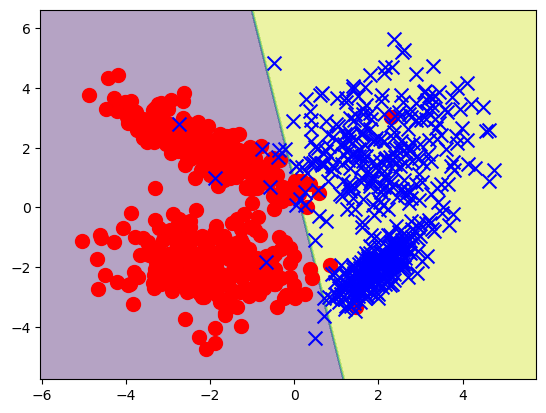

In [16]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logic = LogReg(alpha = 100, n_iters = 10**5) #Всё плохо при альфа = 100 и больше
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logic.fit(X, y)

xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = logic.predict_proba(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

**3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.**

In [17]:
def fit(self, X, y):
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    m = X.shape[1]
    start_b = np.ones(m)
    self.b = self.optimize(X, y, start_b, self.n_iters)

LogReg.fit = fit

In [18]:
def predict(self, X):
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    y_pred = self.predict_proba(X) > 0.5
    return y_pred

LogReg.predict = predict

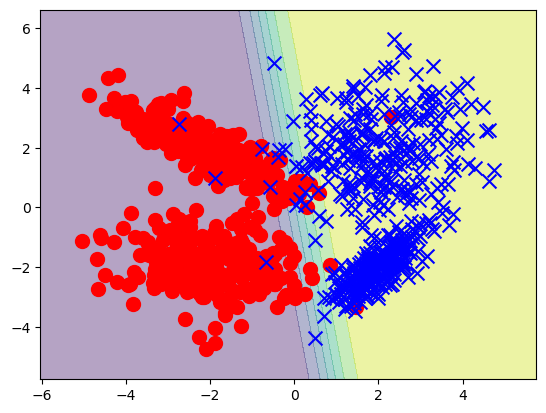

In [19]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logic = LogReg(alpha = 0.5, n_iters = 10**5)
#Здесь уже не добавляем фиктивный столбец
logic.fit(X, y)

#Только здесь добавили к Х столбец - чтобы работал скопированный код ниже
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = logic.predict_proba(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

**4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.**

In [20]:
#Функция по проверке влияния class_sep
def check(cs):
    X,y = make_classification (n_samples=1000,
                              n_features=2,
                              n_informative=2,
                              n_redundant=0,
                              n_classes=2,
                              class_sep=cs,
                              random_state=1)

    logic = LogReg(alpha = 0.5, n_iters = 10**5)
    logic.fit(X, y)

    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    xx, yy = np.meshgrid(
        np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
        np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
    XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
    XX = np.array([(1, *xx) for xx in XX])

    Z = logic.predict_proba(XX)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
    plt.title(f'class_sep = {cs}')

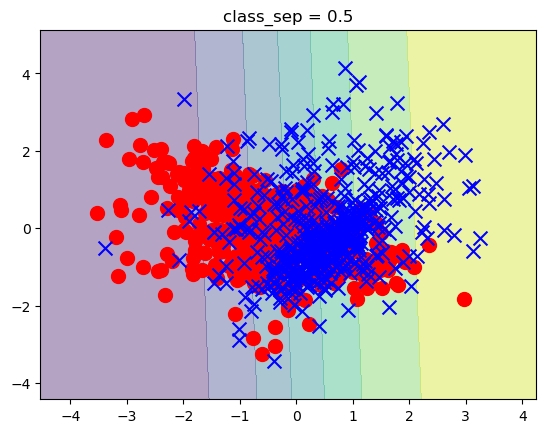

In [21]:
check(0.5)

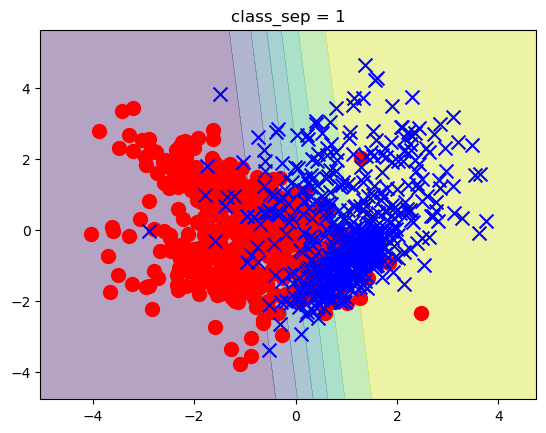

In [22]:
check(1)

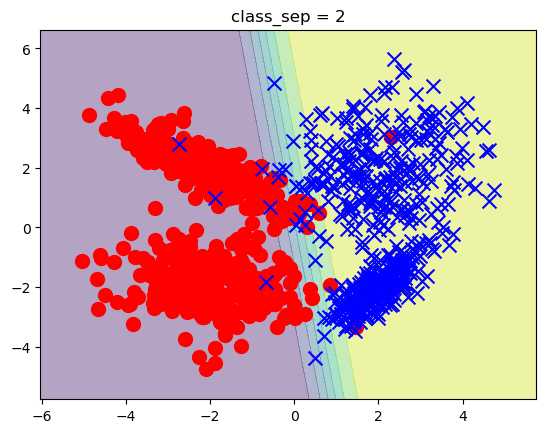

In [23]:
check(2)

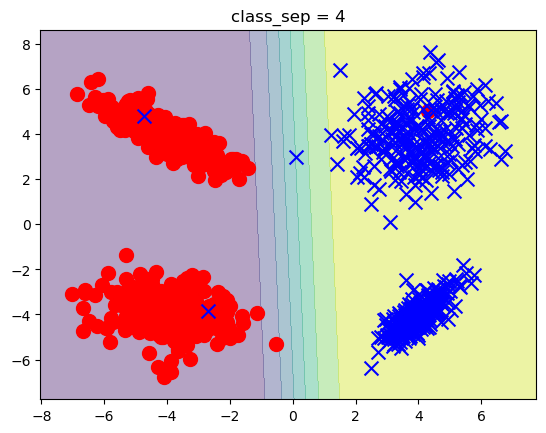

In [24]:
check(4)

Чем выше class_sep, тем больше точность модели

**5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.**

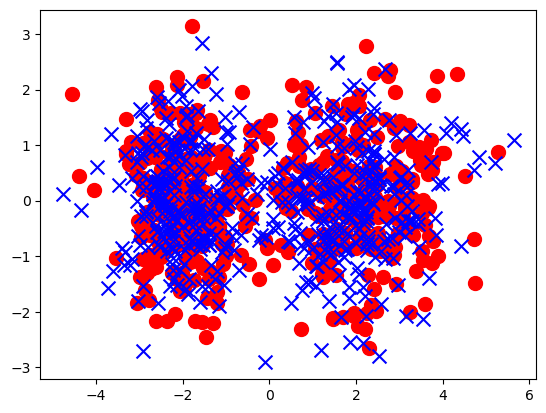

In [25]:
X_big, y_big = make_classification (n_samples=1000,
                                    n_features=5, #Новое число признаков
                                    n_informative=2,
                                    n_redundant=0,
                                    n_classes=2,
                                    class_sep=2,
                                    random_state=1)

plt.scatter(X_big[:, 0][y==0], X_big[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X_big[:, 0][y==1], X_big[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [26]:
logic = LogReg(alpha = 0.5, n_iters = 10**5)
logic.fit(X_big, y_big)

y_pred = logic.predict(X_big)
ac = accuracy_score(y_big, y_pred)
f1 = f1_score(y_big, y_pred)
print(f'accuracy = {ac:.5f} F1-score = {f1:.5f}')

accuracy = 0.97700 F1-score = 0.97698


**6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.**

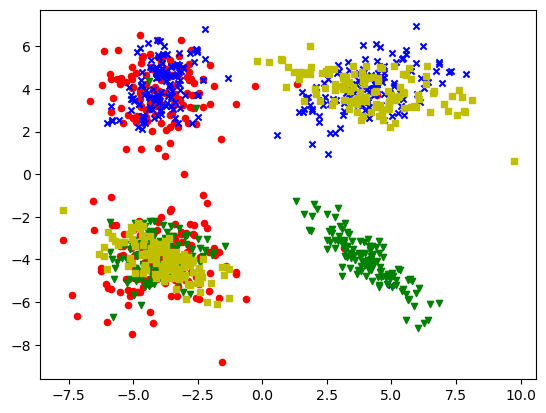

In [27]:
X,y = make_classification(n_samples=1000,
                          n_features=4,
                          n_informative=4,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=4,
                          random_state=0)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], marker="v", c='g', s=20)
plt.scatter(X[:, 0][y==3], X[:, 1][y==3], marker="s", c='y', s=20)
plt.show()

In [28]:
clf = OneVsRestClassifier(SVC()).fit(X, y)
y_pred = clf.predict(X)

ac = accuracy_score(y, y_pred)
print(f'accuracy = {ac:.5f}')

accuracy = 0.99200


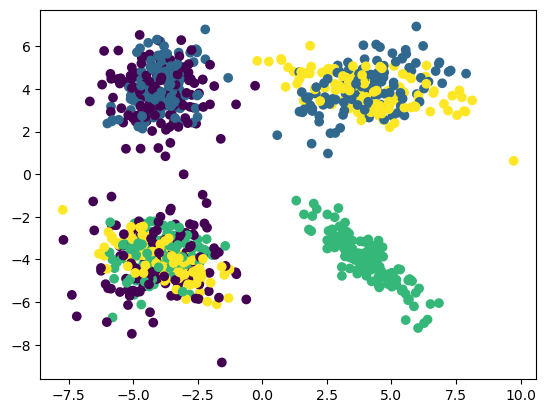

In [29]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred)

**7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.**

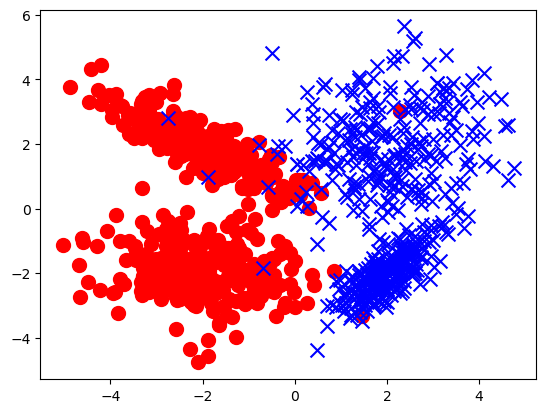

In [30]:
#Наш изначальный датасет
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [31]:
model = LogisticRegression()
model.fit(X, y)

model.predict_proba(X)

array([[3.76134350e-03, 9.96238656e-01],
       [9.86150956e-01, 1.38490435e-02],
       [7.93291865e-01, 2.06708135e-01],
       ...,
       [1.38915208e-04, 9.99861085e-01],
       [9.97398412e-01, 2.60158762e-03],
       [9.96372825e-01, 3.62717529e-03]])